<a href="https://www.kaggle.com/code/danielfourie/genderclassification-knn-99-6-accuracy?scriptVersionId=206198032" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-classification-dataset/gender_classification_v7.csv


In [2]:
dataset = pd.read_csv("/kaggle/input/gender-classification-dataset/gender_classification_v7.csv")

In [3]:
#Look at first 5 rows of data
dataset.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
#We see all columns except forehead_width_cm and forehead_height_cm are already encoded (except gender) Categorical features
#forehead_width_cm and forehead_height_cm are numerical features
#let us encode the gender column where 0 = Female, and 1 = Male
dataset['gender'] = dataset.gender.eq("Male").mul(1)

In [5]:
#Now look at the gender column
dataset.gender

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

In [6]:
#Let us see all the columns for the dataset
dataset.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                         int64
dtype: object

**The dtypes are as expected. Let us see if there are any NaN cells.**

In [7]:
#Check how many NaN values there are in the dataset
dataset.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

**This is great news, as we do not need to do any data cleaning regarding NaN values.**

**Check if columns forehead_width_cm and forehead_height_cm contain
non-sensical values, such as x <=0 for all x $\in R^{+}$.**

In [8]:
print(any(dataset.forehead_width_cm <= 0))
print(any(dataset.forehead_height_cm <= 0))

False
False


**There are no non-sensical values in columns forehead_width_cm and forehead_height_cm.**

In [9]:
#See more data about dataset's numerical features
print(dataset.forehead_width_cm.describe())
print("")
print(dataset.forehead_height_cm.describe())

count    5001.000000
mean       13.181484
std         1.107128
min        11.400000
25%        12.200000
50%        13.100000
75%        14.000000
max        15.500000
Name: forehead_width_cm, dtype: float64

count    5001.000000
mean        5.946311
std         0.541268
min         5.100000
25%         5.500000
50%         5.900000
75%         6.400000
max         7.100000
Name: forehead_height_cm, dtype: float64


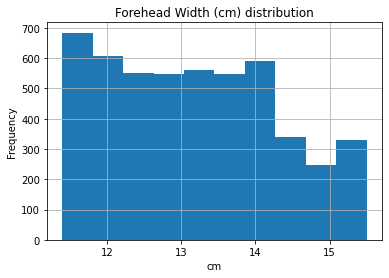

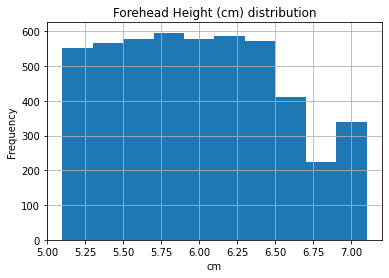

In [10]:
#See distribution of columns forehead_width_cm and forehead_height_cm
distribution_plot = dataset[['forehead_width_cm','forehead_height_cm']]
import matplotlib.pyplot as plt
dataset.forehead_width_cm.hist()
plt.xlabel("cm")
plt.ylabel("Frequency")
plt.title("Forehead Width (cm) distribution")
plt.show()

dataset.forehead_height_cm.hist()
plt.xlabel("cm")
plt.ylabel("Frequency")
plt.title("Forehead Height (cm) distribution")
plt.show()

#### **Let us create our ML model. We will use a KNN model to predict the classification.**

In [11]:
#Assign data into predictive features (X) and the predicted feature (y)
X = dataset.iloc[:,0:8].values
y = dataset.iloc[:,-1].values

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier()
classifier1.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
#Predict on the test set
classifier1TrainScore = round(classifier1.score(X_train,y_train)*100,2)
classifier1TestScore = round(classifier1.score(X_test,y_test)*100,2)
print("Model's training accuracy = " + str(classifier1TrainScore)+"%")
print("Model's test accuracy = " + str(classifier1TestScore)+"%")

Model's training accuracy = 99.87%
Model's test accuracy = 99.6%


**We have a training and test accuracy of 99.87% and 99.6% respectively! We have also avoided overfitting and underfitting. This is a strong model.**

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#d1e3e5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
Thank you for reading through my notebook. I hope you enjoyed it and found it interesting☺️. I will also reply to any comments you have on this notebook. Have a good day!🚀
</p>
</div>